In [0]:
import tensorflow
tensorflow.__version__
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<b/>
Face recognition

Task is to recognize a faces
Dataset

Aligned Face Dataset from Pinterest

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

</b>

In [0]:
#Loading the data
project_path = "/content/drive/My Drive/DLCP/project-3/"

#Extract the zip file
#Extract Aligned Face Dataset from Pinterest.zip

zipfilename = "AlignedFaceDatasetfromPinterest.zip"
from zipfile import ZipFile

with ZipFile(project_path+ zipfilename, 'r') as z:
  z.extractall()

In [0]:
#Function to load images
#Define a function to load the images from the extracted folder and map each image with person id

import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')  

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [0]:
print(metadata[10])
load_image(metadata[10].image_path())


PINS/pins_selena gomez/selena gomez18.jpg


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

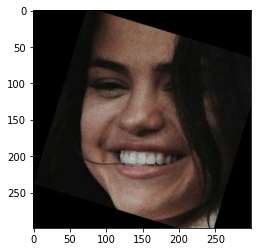

In [0]:
#Display sample images from loaded data
from matplotlib import pyplot as plt
#for i in range(0,5):
plt.imshow(load_image(metadata[10].image_path()))
plt.show() #Display sample  11th image from loaded data

In [0]:
print(metadata.shape)

#10770 total images are available in aligned dataset

load_image(metadata[10].image_path()).shape
# image has 299 299 shape with three channels. 


(10770,)


(299, 299, 3)

In [0]:
#resize the images  to 224 224  using the vgg model

img_h = 224
img_w = 224

def resize_and_normalize():
  #images  are resized to 224 * 224 and the values normalized
  image_set =np.zeros((metadata.shape[0], img_h, img_w, 3))
  for i in range(metadata.shape[0]) :
    img = load_image(metadata[i].image_path())
    img = cv2.resize(img, dsize = (224,224))
    img = (img / 255.).astype(np.float32)
    image_set[i, :, :, :] = img
  return image_set
image_set = resize_and_normalize()

In [0]:
print(image_set.shape)



(10770, 224, 224, 3)


<b/>

Now all the 10770 images are resized so we can input directly to the VGG model and create embedings

An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers. 
In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variables. 
Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and meaningfully represent categories
 in the transformed space.

source: medium.com

</b>

In [0]:
#VGG Face model
#VGG code cell

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model
#The vgg face model has many convolution layers , maxpooling layers and finally softmax activation giving an output of shape 2622 *1

In [0]:
model = vgg_face()
#print (model)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
#Loading pretrained weights data vgg_face_weights.h5
model.load_weights(project_path+'vgg_face_weights.h5')

In [0]:
print(model.name)
print(model.output)
print (model.get_weights)

sequential
Tensor("activation/Identity:0", shape=(None, 2622), dtype=float32)
<bound method Model.get_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fb82a104048>>


In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
print (image_set[0].shape)
print(vgg_face_descriptor)

(224, 224, 3)


In [0]:


# Creating a sample embedding_vector to analyze from previous imageset of 10770 images
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(image_set[0], axis=0))[0]
print(embedding_vector.shape)
print(embedding_vector.dtype)
print(embedding_vector)




(2622,)
float32
[ 0.01224652  0.01505767  0.00533675 ... -0.00749701  0.02938377
  0.02866159]
10770 10


In [0]:
#Generate embeddings for each image in the dataset
# creating an empty array to store embeddings
embeddings = np.empty([metadata.shape[0], 2623] ,dtype=object )
print(embeddings.shape)
print(image_set.shape[0])

(10770, 2623)
10770


In [0]:
# the embeddings are created for all the images
import re
for i in range(image_set.shape[0]) :
  embeddings[i,:2622] = vgg_face_descriptor.predict(np.expand_dims(image_set[i], axis=0))[0]
  embeddings[i,2622] = re.sub('pins_',"",metadata[i].name)
  



#view a sample embedding
embeddings[0]




array([0.012246520258486271, 0.015057672746479511, 0.005336749367415905,
       ..., 0.029383771121501923, 0.028661593794822693, 'selena gomez'],
      dtype=object)

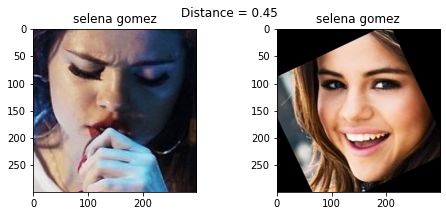

In [0]:

#Function to calculate distance between given 2 pairs of images.
#Consider distance metric as "Squared L2 distance"
#Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2


def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    fig = plt.figure(figsize=(8,3))
    fig.suptitle(f'Distance = {distance(embeddings[idx1,:2622], embeddings[idx2,:2622]):.2f}')
    ax1 = plt.subplot(121)
    ax1.title.set_text(embeddings[idx1,2622])
    plt.imshow(load_image(metadata[idx1].image_path()))
    ax2 = plt.subplot(122)
    ax2.title.set_text(embeddings[idx2,2622])
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 9)

# Distance   between embeddings less than .5  between same person

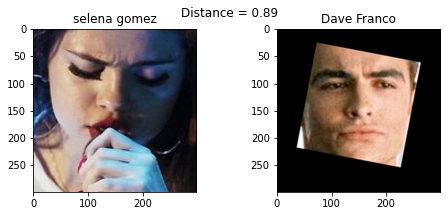

In [0]:
show_pair(2, 180)
# Distance   between embeddings greater than .5  for different person

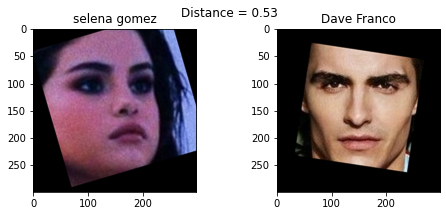

In [0]:
show_pair(30, 100)
#Greater than 0.5 between different persons

#These distances clearly indicate how the embeddings are representing our images in the transformed space. 
#The embeddings of the same person are closer compared to that of different person.


In [0]:


#let us create a pandas dataframe with the embeddings
import pandas as pd

embeddings_df = pd.DataFrame(data = embeddings)
embeddings_df.shape
#It has 10770 rows with 2622 columns representing the image and 2622 column for name

(10770, 2623)

In [0]:
embeddings_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622
0,0.0122465,0.0150577,0.00533675,0.0134822,0.00953055,0.0153322,0.0207159,0.0227231,0.0290435,0.0145229,0.0271789,0.031756,0.0135429,0.0179087,0.0182435,0.00432628,0.0282749,0.0218612,0.0190365,0.0299675,0.0366115,0.0336593,0.0226512,0.0218295,0.0113248,0.0153529,0.0248958,0.0126718,0.0234356,0.0240358,0.0108977,0.016368,-0.0102026,0.0316334,-0.0012787,0.0192354,0.00725187,-0.0138289,0.0176306,0.00485451,...,-0.0274512,-0.0108713,-0.00681784,-0.0128593,0.00379453,0.00497136,0.0344347,-0.0204798,0.000617532,0.0114598,0.00349756,0.0266048,-0.00770032,0.00341315,-0.00375816,-0.0241472,0.00156326,0.0167707,-0.0138816,0.00119348,-0.000303789,-0.0135506,0.00119558,0.015004,-0.000268967,-0.0145801,-0.00735894,-0.00421839,-0.0109678,-0.00399293,0.0136765,-0.00749862,0.046537,0.000965227,0.0151291,-0.0127448,-0.00749701,0.0293838,0.0286616,selena gomez
1,0.0139172,0.0347417,0.0180427,0.00856236,-0.00672041,0.0170816,0.0219809,0.0116635,0.0104459,-0.0110513,0.0479827,-0.0106888,0.0162186,-6.74404e-05,0.0105336,-0.014623,0.0194851,0.0301891,0.0181939,0.0299459,0.0378051,0.0173009,0.00120914,0.0191487,0.017471,0.00598116,0.00979756,0.00461486,0.00960839,-0.0024663,0.0086747,-0.00267787,0.00187118,0.0273514,-0.000568648,0.0119293,0.0505632,-0.0142878,-0.0113334,0.00840988,...,-0.022864,-0.00283307,-0.0186977,-0.013997,0.0184297,-0.00360383,0.0308477,-0.0234026,-0.0242388,0.000747214,0.00329212,0.0255639,-0.0176805,-0.00190358,-0.0155728,-0.000540482,-0.00718647,0.00852453,0.00519061,0.0285883,-0.0121576,-0.00397708,-0.00781384,0.00986815,0.00667746,-0.017247,-0.0026561,-0.00699612,-0.00268732,-0.0190621,-0.00629135,0.00687757,0.0449392,0.0134953,0.0137047,0.0115685,-0.0205209,0.0483575,0.0302032,selena gomez
2,0.00850749,0.010521,0.00491341,-0.0190133,-0.00983727,0.0214306,0.00549029,0.018831,0.0182514,0.00230337,0.0280417,-0.0124438,0.0251839,-0.014624,-0.00283792,-0.0120928,0.0287769,0.0144035,0.00588179,0.00770616,0.007161,0.0150024,-0.00707092,0.0186489,0.00436302,-0.00867907,-0.00160015,-0.00265089,0.00946922,0.0423698,0.00904208,0.0184542,0.00843161,0.00676342,-0.00964716,0.0167762,0.034731,-0.0168229,0.00450916,0.000661045,...,-0.000495737,0.00527303,0.00175447,-0.0105821,0.0157875,0.0113417,0.0180021,-0.0162701,0.0200533,-0.014795,0.0105988,0.0397369,-0.00709365,-0.0124843,0.00661505,-0.00446554,-0.0101758,0.0107406,-0.0113078,0.00403197,-0.0082432,-0.0229906,-0.0152287,0.013312,-0.00308304,-0.0175365,-0.0111136,-0.017165,-0.0248118,-0.0069424,0.000955918,-0.0122839,0.0334596,0.0115542,0.000428596,0.00100679,-0.0312973,0.00997482,0.0270618,selena gomez
3,-0.00378647,0.00242522,0.00338819,-0.0169175,-0.0108435,-0.00253829,-0.0138397,0.0175883,0.00505393,0.00287279,0.0284408,-0.0152104,0.00906952,-0.00501493,0.00259742,-0.0164203,0.0128622,0.0179296,-0.00512817,0.0283401,0.0156468,0.0116695,-0.0104416,0.0179257,-0.0113913,-0.0109059,-0.00811794,-0.0164768,0.00145765,0.049095,0.0148651,-0.00307328,0.00672663,0.0130761,-0.0028082,0.00792116,0.0271864,-0.00725056,0.00217276,-0.00946464,...,-0.00318487,-0.00272308,0.00847939,7.35577e-05,0.00723154,-0.00993315,0.0177385,-0.0039777,-0.00236635,-0.0114713,0.00450957,0.0355036,-0.000368996,0.00662993,0.0101522,0.00984085,-0.0195476,0.0178866,-0.00333333,0.00431562,-0.019012,-0.0141276,-0.0137698,0.00273141,-0.00222367,-0.0161727,-0.0124553,-0.00390521,-0.00644678,0.00127606,-0.00712915,0.0134664,0.014988,0.0137898,-0.00832776,-0.00776766,-0.0254415,0.0120523,0.0517719,selena gomez
4,0.00350565,0.00031591,0.00732945,-0.00386263,0.00460047,0.00835704,-0.00106967,0.014045,0.00304434,0.0113237,0.0294892,-0.0216269,0.0101401,0.00821942,0.000655046,-0.0132836,0.0127578,0.0155956,0.0221829

In [0]:


#Encode the Labels
#The last column has the name as text, let us transform them into integers using label encoding. This will prepare our data to be used by our classifiers.
#Label encoder gives a number to each person name
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
embeddings_df['encoded_target'] = encoder.fit_transform(embeddings_df.iloc[:,-1])
embeddings_df.head()
#now we have added the column 2623 "encoded_target" which contains the target value as number


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,encoded_target
0,0.0122465,0.0150577,0.00533675,0.0134822,0.00953055,0.0153322,0.0207159,0.0227231,0.0290435,0.0145229,0.0271789,0.031756,0.0135429,0.0179087,0.0182435,0.00432628,0.0282749,0.0218612,0.0190365,0.0299675,0.0366115,0.0336593,0.0226512,0.0218295,0.0113248,0.0153529,0.0248958,0.0126718,0.0234356,0.0240358,0.0108977,0.016368,-0.0102026,0.0316334,-0.0012787,0.0192354,0.00725187,-0.0138289,0.0176306,0.00485451,...,-0.0108713,-0.00681784,-0.0128593,0.00379453,0.00497136,0.0344347,-0.0204798,0.000617532,0.0114598,0.00349756,0.0266048,-0.00770032,0.00341315,-0.00375816,-0.0241472,0.00156326,0.0167707,-0.0138816,0.00119348,-0.000303789,-0.0135506,0.00119558,0.015004,-0.000268967,-0.0145801,-0.00735894,-0.00421839,-0.0109678,-0.00399293,0.0136765,-0.00749862,0.046537,0.000965227,0.0151291,-0.0127448,-0.00749701,0.0293838,0.0286616,selena gomez,94
1,0.0139172,0.0347417,0.0180427,0.00856236,-0.00672041,0.0170816,0.0219809,0.0116635,0.0104459,-0.0110513,0.0479827,-0.0106888,0.0162186,-6.74404e-05,0.0105336,-0.014623,0.0194851,0.0301891,0.0181939,0.0299459,0.0378051,0.0173009,0.00120914,0.0191487,0.017471,0.00598116,0.00979756,0.00461486,0.00960839,-0.0024663,0.0086747,-0.00267787,0.00187118,0.0273514,-0.000568648,0.0119293,0.0505632,-0.0142878,-0.0113334,0.00840988,...,-0.00283307,-0.0186977,-0.013997,0.0184297,-0.00360383,0.0308477,-0.0234026,-0.0242388,0.000747214,0.00329212,0.0255639,-0.0176805,-0.00190358,-0.0155728,-0.000540482,-0.00718647,0.00852453,0.00519061,0.0285883,-0.0121576,-0.00397708,-0.00781384,0.00986815,0.00667746,-0.017247,-0.0026561,-0.00699612,-0.00268732,-0.0190621,-0.00629135,0.00687757,0.0449392,0.0134953,0.0137047,0.0115685,-0.0205209,0.0483575,0.0302032,selena gomez,94
2,0.00850749,0.010521,0.00491341,-0.0190133,-0.00983727,0.0214306,0.00549029,0.018831,0.0182514,0.00230337,0.0280417,-0.0124438,0.0251839,-0.014624,-0.00283792,-0.0120928,0.0287769,0.0144035,0.00588179,0.00770616,0.007161,0.0150024,-0.00707092,0.0186489,0.00436302,-0.00867907,-0.00160015,-0.00265089,0.00946922,0.0423698,0.00904208,0.0184542,0.00843161,0.00676342,-0.00964716,0.0167762,0.034731,-0.0168229,0.00450916,0.000661045,...,0.00527303,0.00175447,-0.0105821,0.0157875,0.0113417,0.0180021,-0.0162701,0.0200533,-0.014795,0.0105988,0.0397369,-0.00709365,-0.0124843,0.00661505,-0.00446554,-0.0101758,0.0107406,-0.0113078,0.00403197,-0.0082432,-0.0229906,-0.0152287,0.013312,-0.00308304,-0.0175365,-0.0111136,-0.017165,-0.0248118,-0.0069424,0.000955918,-0.0122839,0.0334596,0.0115542,0.000428596,0.00100679,-0.0312973,0.00997482,0.0270618,selena gomez,94
3,-0.00378647,0.00242522,0.00338819,-0.0169175,-0.0108435,-0.00253829,-0.0138397,0.0175883,0.00505393,0.00287279,0.0284408,-0.0152104,0.00906952,-0.00501493,0.00259742,-0.0164203,0.0128622,0.0179296,-0.00512817,0.0283401,0.0156468,0.0116695,-0.0104416,0.0179257,-0.0113913,-0.0109059,-0.00811794,-0.0164768,0.00145765,0.049095,0.0148651,-0.00307328,0.00672663,0.0130761,-0.0028082,0.00792116,0.0271864,-0.00725056,0.00217276,-0.00946464,...,-0.00272308,0.00847939,7.35577e-05,0.00723154,-0.00993315,0.0177385,-0.0039777,-0.00236635,-0.0114713,0.00450957,0.0355036,-0.000368996,0.00662993,0.0101522,0.00984085,-0.0195476,0.0178866,-0.00333333,0.00431562,-0.019012,-0.0141276,-0.0137698,0.00273141,-0.00222367,-0.0161727,-0.0124553,-0.00390521,-0.00644678,0.00127606,-0.00712915,0.0134664,0.014988,0.0137898,-0.00832776,-0.00776766,-0.0254415,0.0120523,0.0517719,selena gomez,94
4,0.00350565,0.00031591,0.00732945,-0.00386263,0.00460047,0.00835704,-0.00106967,0.014045,0.00304434,0.0113237,0.0294892,-0.0216269,0.0101401,0.00821942,0.000655046,-0.0132836,0.0127578,0.0155956,0.0221829,0.0385059,0.0191858,0.0

In [149]:

print(encoder.inverse_transform([99])[0])
#As an example 'zendaya' is coded as 99
print(embeddings_df.count)


zendaya
<bound method DataFrame.count of                 0            1  ...             2622 encoded_target
0       0.0122465    0.0150577  ...     selena gomez             94
1       0.0139172    0.0347417  ...     selena gomez             94
2      0.00850749     0.010521  ...     selena gomez             94
3     -0.00378647   0.00242522  ...     selena gomez             94
4      0.00350565   0.00031591  ...     selena gomez             94
...           ...          ...  ...              ...            ...
10765  0.00676299    0.0106543  ...  Gwyneth Paltrow             23
10766  0.00616706  0.000761897  ...  Gwyneth Paltrow             23
10767  0.00604442   0.00351337  ...  Gwyneth Paltrow             23
10768   0.0121888    0.0083832  ...  Gwyneth Paltrow             23
10769  0.00321761   0.00841425  ...  Gwyneth Paltrow             23

[10770 rows x 2624 columns]>


In [0]:
#Create train and test sets
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings_df[train_idx].iloc[:, :-2]
X_test = embeddings_df[test_idx].iloc[:, :-2]
y_train = embeddings_df[train_idx].iloc[:, -1]
y_test = embeddings_df[test_idx].iloc[:, -1]

In [0]:
#Create SVM model with standard scaler and PCA dimensionality reduction and hyper parameter tuning with the help of GridSearchCV

In [0]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
n_folds = 2
scaling_options = [StandardScaler()]
#no_of_PCA_features = [250, 320, 375, 450, 1024, 2048]
no_of_PCA_features = [250, 320, 375]
pipe = Pipeline([
 ('scaler', StandardScaler()),
 ('pca_reduction', PCA() ),
 ('model_gs' , svm.SVC())
])
param_grid_models = [
 {'scaler': scaling_options,
 'pca_reduction': [PCA()],
 'pca_reduction__n_components': no_of_PCA_features,
 'model_gs' : [svm.SVC()],
 'model_gs__C': [0.01, 0.05],
 'model_gs__gamma': [0.001, 0.01],
 'model_gs__kernel': ['poly', 'rbf'],
 'model_gs__degree': [1,2],
 'model_gs__decision_function_shape': ['ovo'],
 'model_gs__random_state': [42]}
]
#choosing njobs as -1 to have parallel processing
grid = GridSearchCV(pipe, param_grid = param_grid_models,cv = n_folds, verbose=True , n_jobs=-1)


In [0]:
print(grid)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca_reduction',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('model_gs',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,...
         

In [0]:
# Train the model
import warnings
warnings.filterwarnings("ignore")
classifier = grid.fit(X_train, y_train)


Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 22.8min finished


In [154]:
classifier.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca_reduction',
                 PCA(copy=True, iterated_power='auto', n_components=320,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model_gs',
                 SVC(C=0.05, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovo', degree=1, gamma=0.01,
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [155]:

best_estimator = classifier.best_estimator_
print(best_estimator[0])
print(best_estimator[1])
print(best_estimator[2])

StandardScaler(copy=True, with_mean=True, with_std=True)
PCA(copy=True, iterated_power='auto', n_components=320, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [0]:

#TEST RESULTS

X_test_transformed = best_estimator[0].transform(X_test)
X_test_transformed = best_estimator[1].transform(X_test_transformed)


In [0]:

print(X_test_transformed.shape)

(1197, 320)


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = best_estimator[2].predict(X_test_transformed)
predictions




array([94, 94, 59, ..., 23, 23, 23])

In [0]:
print (classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.96        13
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         7
           7       1.00      0.93      0.96        14
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         9
          10       1.00      0.92      0.96        13
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        10
          13       0.90      1.00      0.95         9
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        15
          16       0.92      0.92      0.92        13
          17       0.88    


</b>

    accuracy                           0.97      1197
   macro avg       0.97      0.97      0.97      1197
weighted avg       0.97      0.97      0.97      1197
#accuracy 0.96
the accuracy comes to 97% and the precision is also 97 percent.

<b/>


In [0]:
print(y_test.shape)
print(confusion_matrix(y_true=y_test,y_pred=predictions))

(1197,)
[[ 8  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 11]]


In [157]:
import numpy.random as rn
random_test_idx = rn.choice(1197,size=(5,),replace=False)
random_test_idx

array([ 964, 1163,  217,  748, 1169])

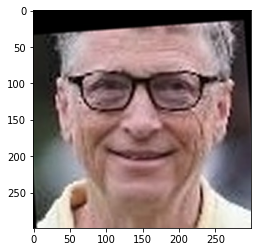

predicted name: bill gates
name given in the data folder: PINS/pins_bill gates/bill gates26.jpg


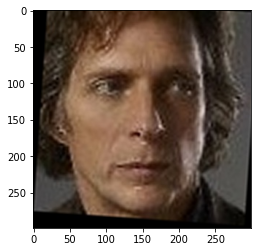

predicted name: William Fichtner
name given in the data folder: PINS/pins_William Fichtner/William Fichtner120.jpg


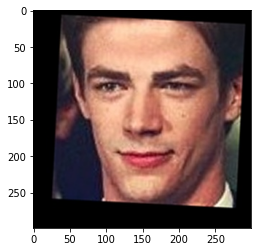

predicted name: grant gustin face
name given in the data folder: PINS/pins_grant gustin face/grant gustin face93.jpg


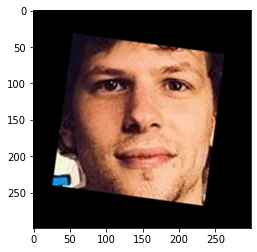

predicted name: Jesse Eisenberg
name given in the data folder: PINS/pins_Jesse Eisenberg/Jesse Eisenberg80_1353.jpg


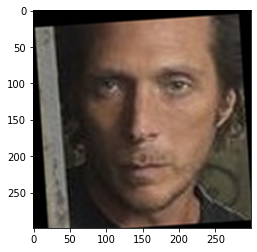

predicted name: William Fichtner
name given in the data folder: PINS/pins_William Fichtner/William Fichtner112.jpg


In [158]:
#Random test for few images
for i in random_test_idx:
  metadata_idx = i*9
  img_path = metadata[metadata_idx].image_path()
  plt.imshow(load_image(img_path))
  plt.show()
  pred = predictions[i]
  pred_name = encoder.inverse_transform([pred])[0]
  print("predicted name: "+pred_name)
  print("name given in the data folder: "+ img_path)


<b/>


#we can clearly see that for all the images we tested , the persons were identified exactly
#Conclusion

#    we have generated embeddings with the VGG face model using transfer learning
#    The embeddings were then given to traditional ML model SVM
#    we have also optimized SVM with standard scaler, PCA and hypertuning
#    The resulting model has an accuracy, precision and recall value of 97 percent


</b>